In [39]:
#Dependencies
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

Sea Surface Temperature **(SST)** of 2020-2021 were collected in 11 points of Corales del Rosario marine National Park to forecast and compare with recent and future temperatures.

In [40]:
df = pd.read_csv('temperatures20-21.csv')

In [41]:
df

,ds,y
0,2020-01-01,28.57
1,2020-01-02,28.73
2,2020-01-03,28.87
3,2020-01-04,29.04
4,2020-01-05,28.95
...,...,...
8025,2021-12-26,29.01
8026,2021-12-27,28.88
8027,2021-12-28,28.79
8028,2021-12-29,28.71


1. First model: disabling yearly seasonality

In [42]:
# Train model
m = Prophet(interval_width=0.95, daily_seasonality=True) # confidence interval of 95%
model = m.fit(df) # fit method

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [43]:
# Forecast
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,28.594823,28.202586,29.342329,28.594823,28.594823,0.141869,0.141869,0.141869,0.17545,0.17545,0.17545,-0.033581,-0.033581,-0.033581,0.0,0.0,0.0,28.736692
1,2020-01-02,28.588280,28.211026,29.350396,28.588280,28.588280,0.160824,0.160824,0.160824,0.17545,0.17545,0.17545,-0.014626,-0.014626,-0.014626,0.0,0.0,0.0,28.749104
2,2020-01-03,28.581736,28.150862,29.364404,28.581736,28.581736,0.175810,0.175810,0.175810,0.17545,0.17545,0.17545,0.000360,0.000360,0.000360,0.0,0.0,0.0,28.757546
3,2020-01-04,28.575193,28.144805,29.309670,28.575193,28.575193,0.177370,0.177370,0.177370,0.17545,0.17545,0.17545,0.001920,0.001920,0.001920,0.0,0.0,0.0,28.752563
4,2020-01-05,28.568649,28.173902,29.367463,28.568649,28.568649,0.183395,0.183395,0.183395,0.17545,0.17545,0.17545,0.007945,0.007945,0.007945,0.0,0.0,0.0,28.752044


In [ ]:
forecast.tail(50)

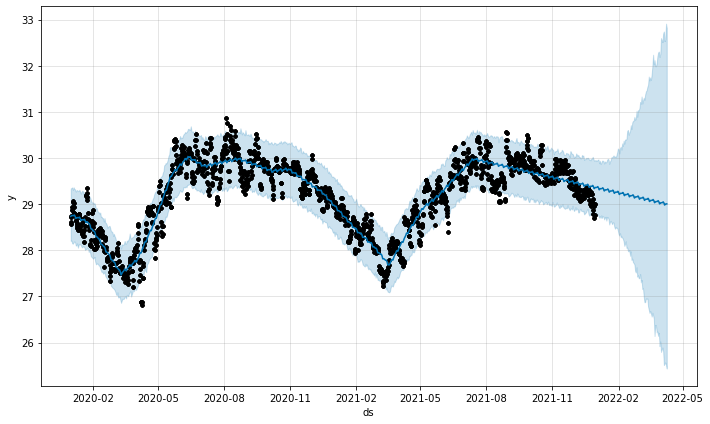

In [45]:
plot1 = m.plot(forecast)
plt.savefig('forecast_t.png', dpi=100)

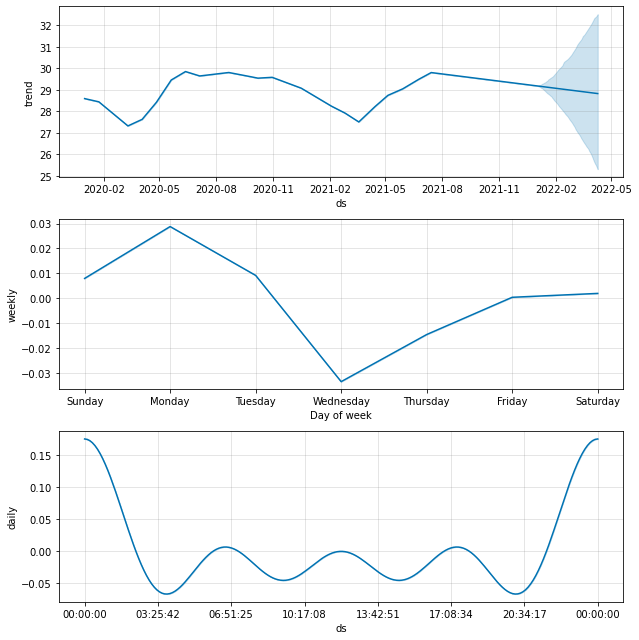

In [46]:
plt2 = m.plot_components(forecast)
plt.savefig('components_t.png', dpi=100)

2. Second Model: enabling  **yearly seasonality**

In [47]:
# Train Model
m2 = Prophet(interval_width=0.95, daily_seasonality=True, yearly_seasonality=True) # confidence interval of 95%
model2 = m2.fit(df) # fit method

In [48]:
# Forecast
future2 = m2.make_future_dataframe(periods=100,freq='D')
forecast2 = m2.predict(future)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,28.591490,28.226748,29.361809,28.591490,28.591490,0.207630,0.207630,0.207630,0.136673,...,-0.033072,-0.033072,-0.033072,0.104029,0.104029,0.104029,0.0,0.0,0.0,28.799120
1,2020-01-02,28.604819,28.262153,29.353187,28.604819,28.604819,0.208373,0.208373,0.208373,0.136673,...,-0.013459,-0.013459,-0.013459,0.085159,0.085159,0.085159,0.0,0.0,0.0,28.813192
2,2020-01-03,28.618148,28.225357,29.365514,28.618148,28.618148,0.199771,0.199771,0.199771,0.136673,...,-0.001269,-0.001269,-0.001269,0.064368,0.064368,0.064368,0.0,0.0,0.0,28.817920
3,2020-01-04,28.631477,28.259054,29.344940,28.631477,28.631477,0.179374,0.179374,0.179374,0.136673,...,0.001033,0.001033,0.001033,0.041669,0.041669,0.041669,0.0,0.0,0.0,28.810851
4,2020-01-05,28.644806,28.270810,29.342869,28.644806,28.644806,0.161582,0.161582,0.161582,0.136673,...,0.007786,0.007786,0.007786,0.017123,0.017123,0.017123,0.0,0.0,0.0,28.806388


In [ ]:
forecast2.tail(50)

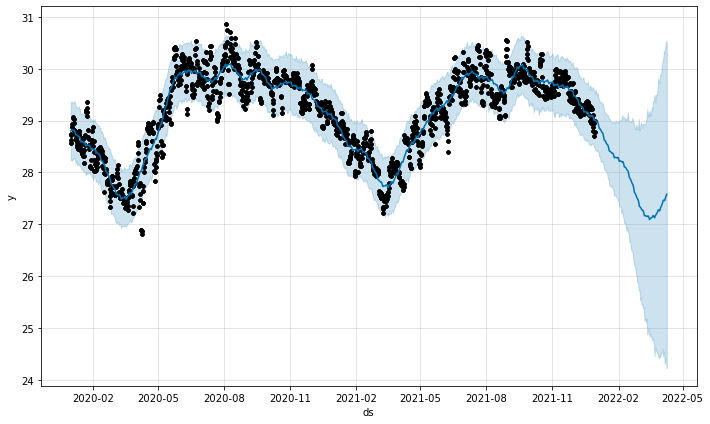

In [50]:
plotm2 = m2.plot(forecast2)

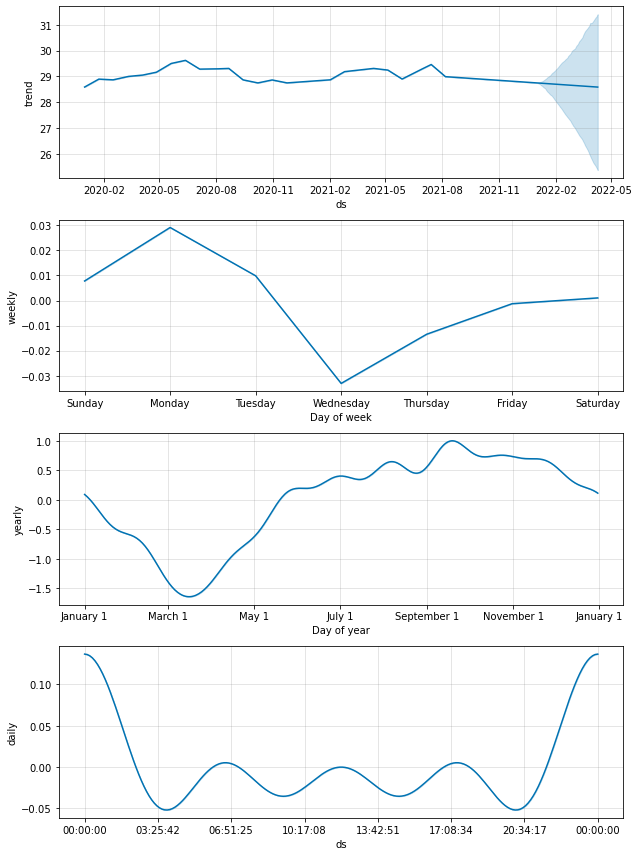

In [52]:
pltm2 = m2.plot_components(forecast2)
plt.savefig('components_t2.png', dpi=100)

Even that the 2 models gives good results, when the  **yhat(predictions)** values are comapred with the temperatures of january and february of 2022 indicate that the model which disables the **yearly_seasonality** is a bit more accurate than the other. Temperatures of the 2 first months of 2022 oscilates between 28 and 29 °C.